# Project: Investigate a Dataset (Medicine usage in breeder cycles)

## Table of Contents

### 1-Introduction
### 2-Data Wrangling
### 3-Exploratory Data Analysis
### 4-Conclusions

<a id='intro'></a>
## Introduction
#### tips:  those Datasets collect information from a database recording medical uses of medicin in breeder farms and our goal is to define the difference between those use in each farm 
#### The major unite of using medicin in this Dataset is the Original order Amount and we analyze throug it using different categories of analysis like *phase* , *calss* , *type* , *farm_name* and *capacity*
>#### **phase** is rearing or production 
>#### **class** is vitamins , antibiotics, disinfectants, vaccination, injection and anticoccidial
>#### **type** is medicin or others
>#### **farm_name** is gelila, hegazi an sultan
>#### **capacity** is the farm area


In [2]:
# importing pandas and numpy libraries
import pandas as pd
import numpy as np

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [21]:
# retriving data from gelila , hegazi and sultan
gelila_df = pd.read_excel('gelila.xlsx')
hegazi_df = pd.read_excel('hegazi.xlsx')
sultan_df = pd.read_excel('sultan.xlsx')

In [27]:
# appending the three set of data together
damas_df = gelila_df.append(hegazi_df,  sort=False).append(sultan_df, sort=False)
damas_df.head()

,Order Number,Quantity To Receive,UM,Line Description,2nd Item Number,Short Item No,Receipt Date,Amount To Receive,Order Date,Ship To,...,Related Type,Related Co,Related Line,Line Number,Tax Y/N,Tax Expl,Tax Rate/Area,Shipment Number,Plan,Elevation
0,22035,NaN,KG,كيس راكومين سم فران,VITXXCLCLEG W06KG9L,914339,NaT,NaN,2021-03-08,20111037,...,,,NaN,1,Y,S,WH,NaN,,
1,22700,NaN,JY,Cid 20 /10L,G05GR1049,5254,2021-03-20,NaN,2021-03-20,20111037,...,,,NaN,1,7,S,VAT,NaN,,
2,22700,NaN,LT,سيد2000 مستورد CID LINES / 5,B01194516BE V504,7833,2021-03-20,NaN,2021-03-20,20111037,...,,,NaN,2,7,S,VAT,NaN,,
3,23152,NaN,EA,شبشب فيبر,E01NPCN 04AL,13883,2021-03-18,NaN,2021-03-18,20111037,...,,,NaN,1,N,S,WH,NaN,,
4,23200,NaN,KG,ارز ابيض مصرى,C0204EG 160613,2961,2021-03-28,NaN,2021-03-28,20111037,...,,,NaN,1,Y,S,WH,NaN,,


In [31]:
# saving data to excel sheet
damas_df.to_excel('damas.xlsx', index= False)

### Data Cleaning 

In [19]:
# defining period for rearing and production 
r_startdate = '01/03/2021'
r_enddate = '15/09/2021'
p_startdate = '16/09/2021'
p_enddate = '31/05/2022'

In [26]:
# defining columns in the dataset
damas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1331 entries, 0 to 528
Data columns (total 62 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Order Number                     1331 non-null   int64         
 1   Quantity To Receive              0 non-null      float64       
 2   UM                               1331 non-null   object        
 3   Line Description                 1331 non-null   object        
 4   2nd Item Number                  1331 non-null   object        
 5   Short Item No                    1331 non-null   int64         
 6   Receipt Date                     1323 non-null   datetime64[ns]
 7   Amount To Receive                0 non-null      float64       
 8   Order Date                       1331 non-null   datetime64[ns]
 9   Ship To                          1331 non-null   int64         
 10  Or Ty                            1331 non-null   object      

In [45]:
# creating dataset based on rearing period
rear_phase_df= damas_df[(damas_df['Order Date'] >= r_startdate) & (damas_df['Order Date'] <= r_enddate)]
rear_phase_df

,Order Number,Quantity To Receive,UM,Line Description,2nd Item Number,Short Item No,Receipt Date,Amount To Receive,Order Date,Ship To,...,Sub Type,Subledger,Unit Cost,Foreign Unit Cost,Request Date,G/L Date,Original Ordered Amount,Original Ordered Foreign Amount,3rd Item Number,farm_name
0,22035,NaN,KG,كيس راكومين سم فران,VITXXCLCLEG W06KG9L,914339,NaT,NaN,2021-03-08,20111037,...,,,195.300000,0,2021-03-08,2021-03-08,585.90,0,041040105802,gelila
1,22700,NaN,JY,Cid 20 /10L,G05GR1049,5254,2021-03-20,NaN,2021-03-20,20111037,...,,,1240.000000,0,2021-03-20,2021-03-20,1240.00,0,042040200302,gelila
2,22700,NaN,LT,سيد2000 مستورد CID LINES / 5,B01194516BE V504,7833,2021-03-20,NaN,2021-03-20,20111037,...,,,652.631579,0,2021-03-20,2021-03-20,652.63,0,042040100401,gelila
3,23152,NaN,EA,شبشب فيبر,E01NPCN 04AL,13883,2021-03-18,NaN,2021-03-18,20111037,...,,,15.950000,0,2021-03-18,2021-03-18,159.50,0,61091000500,gelila
4,23200,NaN,KG,ارز ابيض مصرى,C0204EG 160613,2961,2021-03-28,NaN,2021-03-28,20111037,...,,,7.020000,0,2021-03-28,2021-03-28,91.26,0,021050100100,gelila
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,30494,NaN,EA,لمبه ليد15وات كانيون سويدى صفر,A010117HHHH NPNP^AI,1014375,2021-09-13,NaN,2021-09-13,20111003,...,,,62.399952,0,2021-09-13,2021-09-13,3120.00,0,6222030817555,sultan
269,30611,NaN,BT,رويال استربتو مايسين 200جم,ABIANDOMDEG OMPOBWL,921088,2021-09-12,NaN,2021-09-12,20111003,...,,,111.000000,0,2021-09-12,2021-09-12,2220.00,0,6222030814851,sultan
270,30611,NaN,EA,ماء مقطره,Q77NPNPEGNP,19950,2021-09-12,NaN,2021-09-12,20111003,...,,,2.500000,0,2021-09-12,2021-09-12,100.00,0,041040104587,sultan
271,30638,NaN,TN,علف انتاجى 1 امهات روص 1,FFPYBRLYB5PMH50K,10901,2021-09-15,NaN,2021-09-15,20111003,...,,,7200.000000,0,2021-09-15,2021-09-15,57960.00,0,6222030805910,sultan


In [46]:
# creating Dataset based on production farm 
prod_phase_df= damas_df[(damas_df['Order Date'] >= p_startdate) & (damas_df['Order Date'] <= p_enddate)]
prod_phase_df

,Order Number,Quantity To Receive,UM,Line Description,2nd Item Number,Short Item No,Receipt Date,Amount To Receive,Order Date,Ship To,...,Sub Type,Subledger,Unit Cost,Foreign Unit Cost,Request Date,G/L Date,Original Ordered Amount,Original Ordered Foreign Amount,3rd Item Number,farm_name
134,30725,NaN,TN,علف انتاجى 1 امهات روص 1,FFPYBRLYB5PMH50K,10901,2021-09-17,NaN,2021-09-17,20111037,...,,,7200.00,0,2021-09-17,2021-09-17,28800.00,0,6222030805910,gelila
135,30859,NaN,AM,كولون 30 غنام 2500,VACLVELCLHH 03DAA1L,1049025,2021-09-18,NaN,2021-09-18,20111037,...,,,213.00,0,2021-09-18,2021-09-18,852.00,0,6222030818309,gelila
136,31049,NaN,TN,علف انتاجى 1 امهات روص 1,FFPYBRLYB5PMH50K,10901,2021-09-24,NaN,2021-09-24,20111037,...,,,7200.00,0,2021-09-24,2021-09-24,28872.00,0,6222030805910,gelila
137,31050,NaN,TN,علف ذكور امهات روص 11.5%,FFPYBRMLB1HMH50K,10906,2021-09-24,NaN,2021-09-24,20111037,...,,,6950.00,0,2021-09-24,2021-09-24,6950.00,0,6222030805965,gelila
138,31059,NaN,BT,نايل اسبيرا سول 100جم,ABIAVIZBJHH 86ZOBWL,985161,2021-09-23,NaN,2021-09-23,20111037,...,,,235.29,0,2021-09-23,2021-09-23,1176.45,0,6222030816749,gelila
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,40991,NaN,TN,علف ذكور امهات روص 11.5%,FFPYBRMLB1HMH50K,10906,2022-04-23,NaN,2022-04-23,20111003,...,,,15125.00,0,2022-04-23,2022-04-23,30250.00,0,6222030805965,sultan
525,41051,NaN,TN,علف انتاجى 2 امهات روص 14,FFPYBRLYB4HMH50K,10902,2022-04-24,NaN,2022-04-24,20111003,...,,,15275.00,0,2022-04-24,2022-04-24,122352.75,0,6222030805927,sultan
526,41087,NaN,TN,علف انتاجى 2 امهات روص 14,FFPYBRLYB4HMH50K,10902,2022-04-25,NaN,2022-04-25,20111003,...,,,15275.00,0,2022-04-25,2022-04-25,121894.50,0,6222030805927,sultan
527,41464,NaN,TN,علف انتاجى 2 امهات روص 14,FFPYBRLYB4HMH50K,10902,2022-05-08,NaN,2022-05-08,20111003,...,,,11000.00,0,2022-05-08,2022-05-08,87890.00,0,6222030805927,sultan


In [40]:
# droping columns we do not need 
damas_df.drop(damas_df.columns[[10,12, 13, 14, 15, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 31, 32, 34, 35, 36, 38, 39, 40, 
                          41, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]], axis = 1, inplace= True )


IndexError: index 20 is out of bounds for axis 0 with size 20

In [41]:
damas_df

,Order Number,Quantity To Receive,UM,Line Description,2nd Item Number,Short Item No,Receipt Date,Amount To Receive,Order Date,Ship To,Order Co,Sub Type,Subledger,Unit Cost,Foreign Unit Cost,Request Date,G/L Date,Original Ordered Amount,Original Ordered Foreign Amount,3rd Item Number
0,22035,NaN,KG,كيس راكومين سم فران,VITXXCLCLEG W06KG9L,914339,NaT,NaN,2021-03-08,20111037,2011,,,195.300000,0,2021-03-08,2021-03-08,585.90,0,041040105802
1,22700,NaN,JY,Cid 20 /10L,G05GR1049,5254,2021-03-20,NaN,2021-03-20,20111037,2011,,,1240.000000,0,2021-03-20,2021-03-20,1240.00,0,042040200302
2,22700,NaN,LT,سيد2000 مستورد CID LINES / 5,B01194516BE V504,7833,2021-03-20,NaN,2021-03-20,20111037,2011,,,652.631579,0,2021-03-20,2021-03-20,652.63,0,042040100401
3,23152,NaN,EA,شبشب فيبر,E01NPCN 04AL,13883,2021-03-18,NaN,2021-03-18,20111037,2011,,,15.950000,0,2021-03-18,2021-03-18,159.50,0,61091000500
4,23200,NaN,KG,ارز ابيض مصرى,C0204EG 160613,2961,2021-03-28,NaN,2021-03-28,20111037,2011,,,7.020000,0,2021-03-28,2021-03-28,91.26,0,021050100100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,40991,NaN,TN,علف ذكور امهات روص 11.5%,FFPYBRMLB1HMH50K,10906,2022-04-23,NaN,2022-04-23,20111003,2011,,,15125.000000,0,2022-04-23,2022-04-23,30250.00,0,6222030805965
525,41051,NaN,TN,علف انتاجى 2 امهات روص 14,FFPYBRLYB4HMH50K,10902,2022-04-24,NaN,2022-04-24,20111003,2011,,,15275.000000,0,2022-04-24,2022-04-24,122352.75,0,6222030805927
526,41087,NaN,TN,علف انتاجى 2 امهات روص 14,FFPYBRLYB4HMH50K,10902,2022-04-25,NaN,2022-04-25,20111003,2011,,,15275.000000,0,2022-04-25,2022-04-25,121894.50,0,6222030805927
527,41464,NaN,TN,علف انتاجى 2 امهات روص 14,FFPYBRLYB4HMH50K,10902,2022-05-08,NaN,2022-05-08,20111003,2011,,,11000.000000,0,2022-05-08,2022-05-08,87890.00,0,6222030805927


In [47]:
damas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1331 entries, 0 to 528
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Order Number                     1331 non-null   int64         
 1   Quantity To Receive              0 non-null      float64       
 2   UM                               1331 non-null   object        
 3   Line Description                 1331 non-null   object        
 4   2nd Item Number                  1331 non-null   object        
 5   Short Item No                    1331 non-null   int64         
 6   Receipt Date                     1323 non-null   datetime64[ns]
 7   Amount To Receive                0 non-null      float64       
 8   Order Date                       1331 non-null   datetime64[ns]
 9   Ship To                          1331 non-null   int64         
 10  Order Co                         1331 non-null   int64       

In [43]:
# Creating a column name farm name as the data is recording in the dataset according to the branch planet number
farm_name = { 20111037:'gelila', 20111002:'hegazi', 20111003:'sultan' }
damas_df['farm_name'] = damas_df['Ship To'].map(farm_name)
damas_df['farm_name']

0      gelila
1      gelila
2      gelila
3      gelila
4      gelila
        ...  
524    sultan
525    sultan
526    sultan
527    sultan
528    sultan
Name: farm_name, Length: 1331, dtype: object

In [48]:
# spliting the dataset for rearing and production in different sheet to create a columns called phase in every dataset
rear_phase_df.to_excel('rear_phase.xlsx', index= False)
prod_phase_df.to_excel('prod_phase.xlsx', index= False)

In [49]:
# repeating the name of rearing and production in the datast  
rphase = np.repeat('Rearing', rear_phase_df.shape[0])
pphase= np.repeat('Production', prod_phase_df.shape[0])
rear_phase_df['phase'] = rphase
prod_phase_df['phase'] = pphase

C:\Users\AMERFA~1\AppData\Local\Temp/ipykernel_10376/804128330.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rear_phase_df['phase'] = rphase
C:\Users\AMERFA~1\AppData\Local\Temp/ipykernel_10376/804128330.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_phase_df['phase'] = pphase


In [50]:
# appending the Two Dataset again 
damas_df2 =rear_phase_df.append(prod_phase_df,  sort=False)

In [51]:
damas_df2.to_excel('damass2.xlsx', index= False)

In [52]:
damas_df2['phase'].unique()

array(['Rearing', 'Production'], dtype=object)

In [54]:
# estimating the quantity for every item based on the unit cost and total amount 
damas_df2['quantity'] = damas_df2['Original Ordered Amount']/ damas_df2['Unit Cost']
damas_df2['quantity']

0       3.000000
1       1.000000
2       0.999998
3      10.000000
4      13.000000
         ...    
524     2.000000
525     8.010000
526     7.980000
527     7.990000
528     4.000000
Name: quantity, Length: 1331, dtype: float64

In [103]:
# defining class medicin amoung different classes 
med_class = pd.read_excel('med_class.xlsx')
med_class.head()

,Line Description,Short Item No,type,class
0,كيس راكومين سم فران,914339,medicin,disinfectants
1,Cid 20 /10L,5254,medicin,disinfectants
2,سيد2000 مستورد CID LINES / 5,7833,medicin,disinfectants
3,شبشب فيبر,13883,others,NaN
4,ارز ابيض مصرى,2961,others,NaN


In [129]:
damas_df3= damas_df2.merge(med_class, on = 'Short Item No' )
damas_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1331 entries, 0 to 1330
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Order Number                     1331 non-null   int64         
 1   Quantity To Receive              0 non-null      float64       
 2   UM                               1331 non-null   object        
 3   Line Description_x               1331 non-null   object        
 4   2nd Item Number                  1331 non-null   object        
 5   Short Item No                    1331 non-null   int64         
 6   Receipt Date                     1323 non-null   datetime64[ns]
 7   Amount To Receive                0 non-null      float64       
 8   Order Date                       1331 non-null   datetime64[ns]
 9   Ship To                          1331 non-null   int64         
 10  Order Co                         1331 non-null   int64      

In [165]:
# creating a dataset based on medicin calss only
damas_df4 = damas_df3[damas_df3['type'] == 'medicin']
damas_df4.head()

,Order Number,Quantity To Receive,UM,Line Description_x,2nd Item Number,Short Item No,Receipt Date,Amount To Receive,Order Date,Ship To,...,G/L Date,Original Ordered Amount,Original Ordered Foreign Amount,3rd Item Number,farm_name,phase,quantity,Line Description_y,type,class
0,22035,NaN,KG,كيس راكومين سم فران,VITXXCLCLEG W06KG9L,914339,NaT,NaN,2021-03-08,20111037,...,2021-03-08,585.90,0,041040105802,gelila,Rearing,3.000000,كيس راكومين سم فران,medicin,disinfectants
1,22037,NaN,KG,كيس راكومين سم فران,VITXXCLCLEG W06KG9L,914339,2021-03-15,NaN,2021-03-09,20111002,...,2021-03-09,976.50,0,041040105802,hegazi,Rearing,5.000000,كيس راكومين سم فران,medicin,disinfectants
2,22038,NaN,KG,كيس راكومين سم فران,VITXXCLCLEG W06KG9L,914339,2021-03-09,NaN,2021-03-09,20111003,...,2021-03-09,976.50,0,041040105802,sultan,Rearing,5.000000,كيس راكومين سم فران,medicin,disinfectants
3,22700,NaN,JY,Cid 20 /10L,G05GR1049,5254,2021-03-20,NaN,2021-03-20,20111037,...,2021-03-20,1240.00,0,042040200302,gelila,Rearing,1.000000,Cid 20 /10L,medicin,disinfectants
4,27150,NaN,JY,Cid 20 /10L,G05GR1049,5254,2021-06-24,NaN,2021-06-24,20111037,...,2021-06-24,2610.53,0,6222030805057,gelila,Rearing,2.000003,Cid 20 /10L,medicin,disinfectants


In [374]:
# defiining Farm capacities in dictionary 
farm_cap= { 20111037: 5000, 20111002: 16000, 20111003: 20000}
             
damas_df4['capacity'] = damas_df4['Ship To'].map(farm_cap)
damas_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678 entries, 0 to 1328
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Order Number                     678 non-null    int64         
 1   Quantity To Receive              0 non-null      float64       
 2   UM                               678 non-null    object        
 3   Line Description_x               678 non-null    object        
 4   2nd Item Number                  678 non-null    object        
 5   Short Item No                    678 non-null    int64         
 6   Receipt Date                     673 non-null    datetime64[ns]
 7   Amount To Receive                0 non-null      float64       
 8   Order Date                       678 non-null    datetime64[ns]
 9   Ship To                          678 non-null    int64         
 10  Order Co                         678 non-null    int64       

C:\Users\AMERFA~1\AppData\Local\Temp/ipykernel_10376/741409852.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  damas_df4['capacity'] = damas_df4['Ship To'].map(farm_cap)


<a id='eda'></a>
## Exploratory Data Analysis

In [831]:
# calculating medical Cost for farm 
cycle_cost_total = pd.DataFrame(damas_df4.groupby(['farm_name' , 'type'])['Original Ordered Amount'].sum())
cycle_cost_total

,,Original Ordered Amount
farm_name,type,
gelila,medicin,523753.56
hegazi,medicin,2352927.47
sultan,medicin,2901117.26


In [482]:
# calculating medical cost per bird 
cycle_cost = (damas_df4.groupby('farm_name' )['Original Ordered Amount'].sum()
              / damas_df4.groupby('farm_name' )['capacity'].mean()) 
cycle_cost

farm_name
gelila    104.750712
hegazi    147.057967
sultan    145.055863
dtype: float64

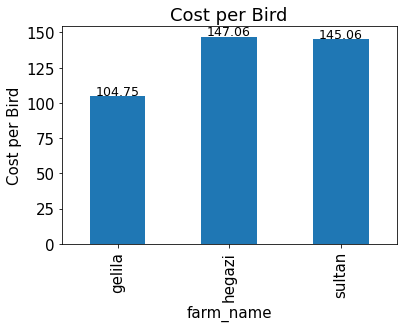

In [730]:
# creating a plot to describe Cost in every Farm 
fig, ax = plt.subplots()
cycle_cost.plot(kind= 'bar', ylabel='Cost per Bird' )
ax.set_title('Cost per Bird')

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(0, 5), textcoords='offset points', size = 'small')
plt.show()

In [832]:
class_cost= (damas_df4.groupby(['class','farm_name', 'capacity' ]).agg(cost_per_bird= ('Original Ordered Amount', 'sum') )
              / damas_df4.groupby(['class','farm_name', 'capacity' ]).agg(cost_per_bird= ('capacity', 'mean')) )
class_cost

cost_per_bird
class         farm_name capacity               
antibiotics   gelila    5000          26.093492
              hegazi    16000         23.100591
              sultan    20000         24.593555
anticoccidial gelila    5000           0.423600
              hegazi    16000          3.138750
              sultan    20000          5.022000
disinfectants gelila    5000           6.977116
              hegazi    16000          4.505249
              sultan    20000          2.876259
injection     gelila    5000          14.121076
              hegazi    16000         12.747231
              sultan    20000         11.267743
vaccination   gelila    5000          25.520600
              hegazi    16000         64.831957
              sultan    20000         64.545791
vitamins      gelila    5000          31.614828
              hegazi    16000         38.734190
              sultan    20000         36.750515

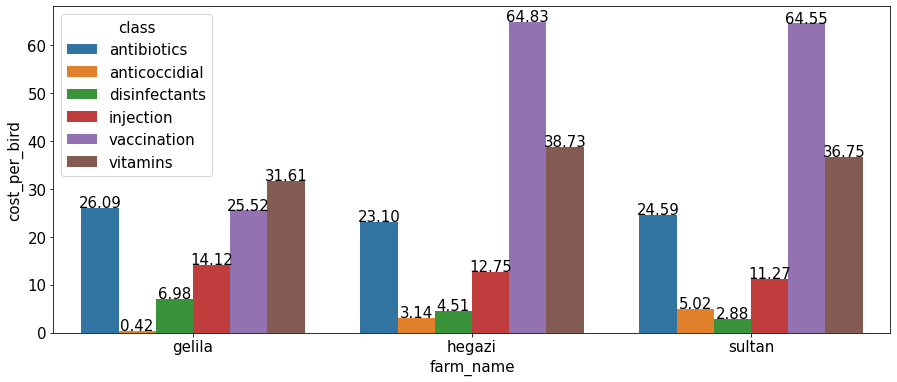

In [833]:
import seaborn as sns 

class_cost= class_cost.reset_index()
fig, ax = plt.subplots()
fig.set_size_inches([15, 6])
sns.barplot(x="farm_name",
           y="cost_per_bird", 
           hue="class", 
           data=class_cost)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(0, 5), textcoords='offset points', size = 'medium')
plt.show()

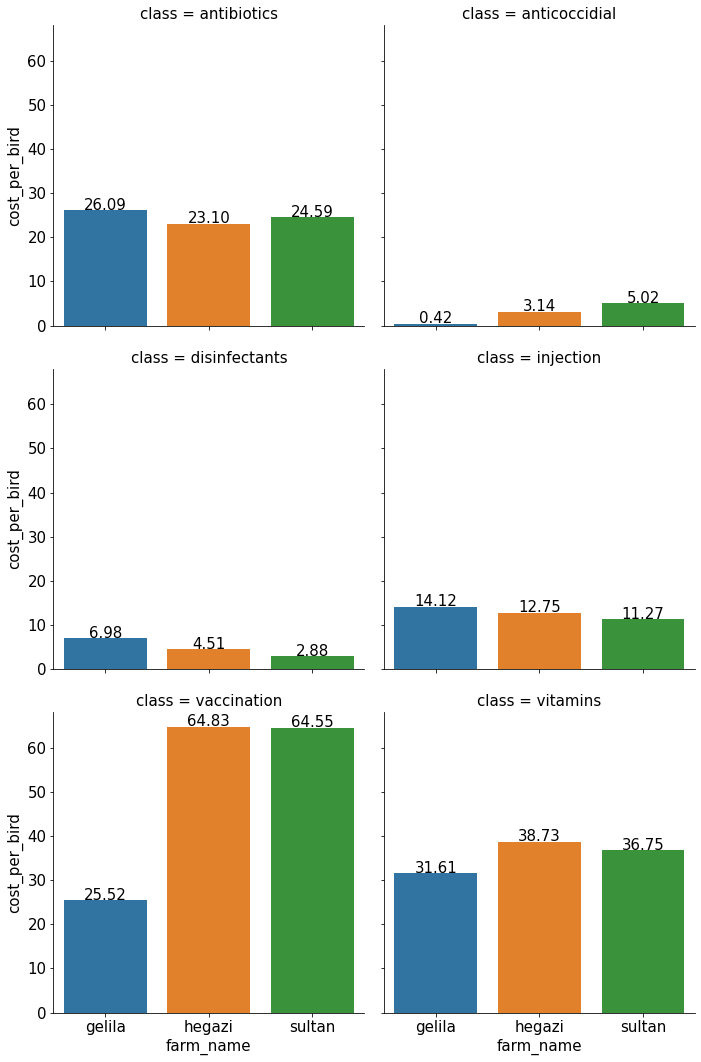

In [727]:
g= sns.catplot(x="farm_name",
            y="cost_per_bird",
            data = class_cost, 
            kind = "bar",
            col = "class", 
            col_wrap =2 )

for ax in g.axes.ravel():
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', rotation=0, xytext=(0, 5), textcoords='offset points', size = 'medium')
plt.show()

In [835]:
cycle_cost_class = pd.DataFrame(damas_df4.groupby('class')['Original Ordered Amount'].sum())
               
cycle_cost_class

,Original Ordered Amount
class,
antibiotics,991948.01
anticoccidial,152778.00
disinfectants,164494.73
injection,499915.94
vaccination,2455830.13
vitamins,1512831.48


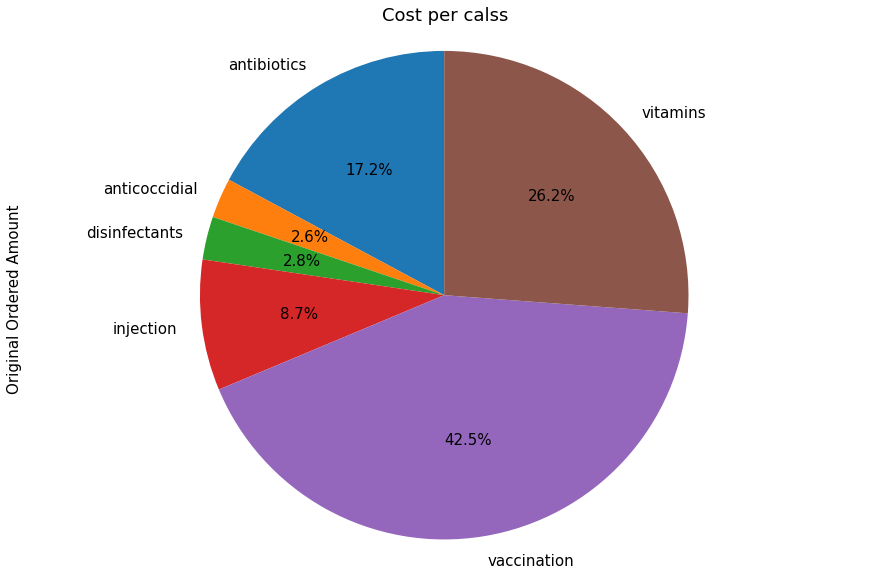

In [837]:
cycle_cost_class = damas_df4.groupby('class')['Original Ordered Amount'].sum()
               

fig, ax1 = plt.subplots()
fig.set_size_inches([15, 10])
cycle_cost_class.plot(kind= 'pie', autopct='%1.1f%%',  startangle=90)
ax1.set_title('Cost per calss')
ax1.axis('equal')
plt.rcParams.update({'font.size': 15})
plt.show()

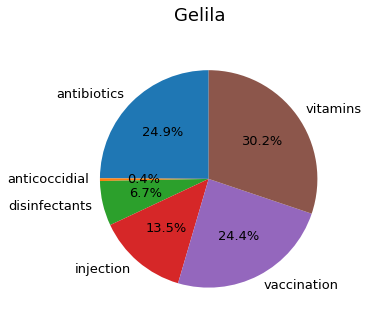

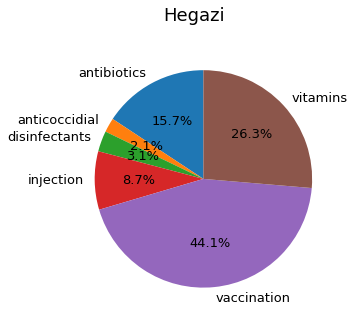

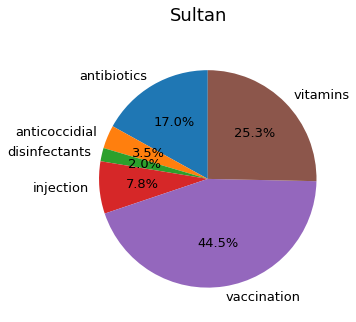

In [824]:
cycle_cost_class_farm = pd.DataFrame(damas_df4.groupby(['farm_name', 'class'])['Original Ordered Amount'].sum())
               
cycle_cost_class_farm.reset_index()

#fig.set_size_inches([10, 10])
cycle_cost_class_farm.loc['gelila'].plot(kind= 'pie', 
                autopct='%1.1f%%', ylabel= "", startangle=90, subplots=True, legend= False, title= 'Gelila'
                                         , figsize=(10,5),fontsize= 13 )
cycle_cost_class_farm.loc['hegazi'].plot(kind= 'pie', autopct='%1.1f%%', ylabel= "",
                                 startangle=90, subplots=True, legend= False, title= 'Hegazi',  figsize=(10,5) ,fontsize= 13)
cycle_cost_class_farm.loc['sultan'].plot(kind= 'pie', autopct='%1.1f%%', ylabel= "",
                                  startangle=90, subplots=True, legend= False, title= 'Sultan', figsize=(10,5) ,fontsize= 13)
plt.show()

In [884]:
cycle_cost_phase = damas_df4.groupby(['farm_name', 'phase'])['Original Ordered Amount'].sum()
cycle_cost_phase = pd.DataFrame(cycle_cost_phase)
cycle_cost_phase

Original Ordered Amount
farm_name phase                              
gelila    Production                334525.47
          Rearing                   189228.09
hegazi    Production                929351.28
          Rearing                  1423576.19
sultan    Production               1096326.54
          Rearing                  1804790.72

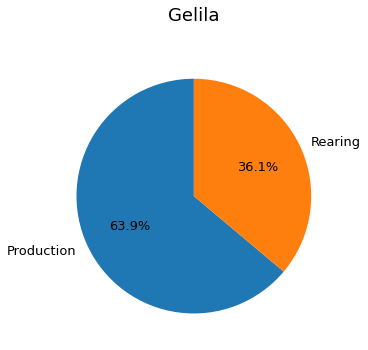

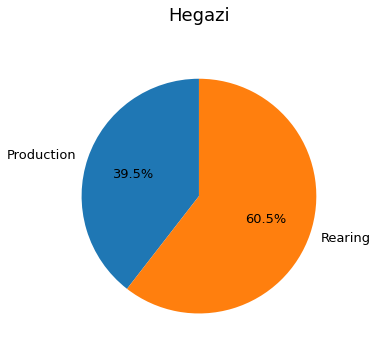

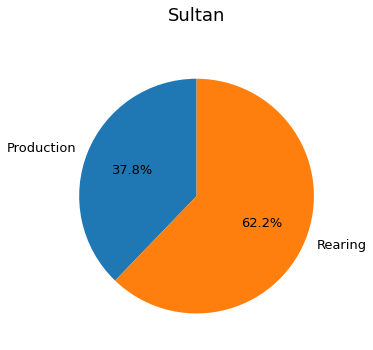

In [885]:
cycle_cost_phase.loc['gelila'].plot(kind= 'pie', autopct='%1.1f%%', ylabel= "", startangle=90, subplots=True, legend= False, title= 'Gelila'
                                         , figsize=(10,5),fontsize= 13)
cycle_cost_phase.loc['hegazi'].plot(kind= 'pie', autopct='%1.1f%%', ylabel= "", startangle=90, subplots=True, legend= False, title= 'Hegazi'
                                         , figsize=(10,5),fontsize= 13)
cycle_cost_phase.loc['sultan'].plot(kind= 'pie', autopct='%1.1f%%', ylabel= "", startangle=90, subplots=True, legend= False, title= 'Sultan'
                                         , figsize=(10,5),fontsize= 13)

plt.show()

<a id='conclusions'></a>
## Conclusions

In [909]:
cycle_cost_phase_class = damas_df4.groupby(['farm_name', 'phase', 'class', 'capacity']).agg(cost_per_bird= ('Original Ordered Amount', 'sum')) / damas_df4.groupby(['farm_name', 'phase', 'class', 'capacity']).agg(cost_per_bird= ('capacity', 'mean')) 
cycle_cost_phase_class



cost_per_bird
farm_name phase      class         capacity               
gelila    Production antibiotics   5000          20.073492
                     disinfectants 5000           3.651016
                     injection     5000          11.361020
                     vaccination   5000           6.988000
                     vitamins      5000          24.831566
          Rearing    antibiotics   5000           6.020000
                     anticoccidial 5000           0.423600
                     disinfectants 5000           3.326100
                     injection     5000           2.760056
                     vaccination   5000          18.532600
                     vitamins      5000           6.783262
hegazi    Production antibiotics   16000         13.710591
                     disinfectants 16000          2.319147
                     injection     16000         10.253649
                     vaccination   16000          7.273087
                     vitamins      16000         24.527981
          Rearing    antibiotics   16000          9.390000
                     anticoccidial 16000          3.138750
                     disinfectants 16000          2.186102
                     injection     16000          2.493581
                     vaccination   16000         57.558869
                     vitamins      16000         14.206209
sultan    Production antibiotics   20000         14.966805
                     disinfectants 20000          1.788643
                     injection     20000          8.144949
                     vaccination   20000          7.348752
                     vitamins      20000         22.567177
          Rearing    antibiotics   20000          9.626750
                     anticoccidial 20000          5.022000
                     disinfectants 20000          1.087616
                     injection     20000          3.122794
                     vaccination   20000         57.197038
                     vitamins      20000         14.183338

In [922]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295